In [2]:
from arcgis.features import find_locations
from arcgis.features.analyze_patterns import interpolate_points
from arcgis.features import use_proximity
from arcgis.features import summarize_data

from arcgis.geocoding import geocode

import arcgis 
from arcgis.gis import GIS

import pandas as pd
import os
import json
from IPython.display import display

from data.geographic import gisConn, gisUser, gisPass
gis = GIS(gisConn, gisUser, gisPass)



In [3]:
def registerWithGis(gis):
    web_map_dict = dict()
    web_map_dict1 = dict()
    with open("./data/arcgis_map.json","r") as file_handle:
        web_map_dict = json.load(file_handle)

    with open("./data/arcgis_map_scene.json","r") as file_handle:
        web_map_dict1 = json.load(file_handle)
    return web_map_dict, web_map_dict1, gis



In [4]:
gis = GIS()
web_map_dict, web_map_dict1, gis = registerWithGis(gis)
search_result = gis.content.search("title:2012 USA Median Age AND owner:esri", 
                                   item_type = "Map Service", outside_org = True)

search_result

[<Item title:"2012 USA Median Household Income (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Age (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Home Value (Mature Support)" type:Map Service owner:esri>,
 <Item title:"2012 USA Median Net Worth (Mature Support)" type:Map Service owner:esri>]

<Item title:"2012 USA Median Age (Mature Support)" type:Map Service owner:esri>
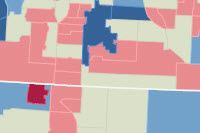

In [16]:
median_age_weblayer = search_result[1]
median_age_weblayer

In [17]:
web_map_dict1['operationalLayers'][0]['itemId'] = median_age_weblayer.itemid
web_map_dict1['operationalLayers'][0]['layerType'] = "ArcGISMapServiceLayer"
web_map_dict1['operationalLayers'][0]['title'] = median_age_weblayer.title
web_map_dict1['operationalLayers'][0]['url'] = median_age_weblayer.url

web_map_dict1

{'baseMap': {'baseMapLayers': [{'id': 'defaultBasemap',
    'layerType': 'ArcGISTiledMapServiceLayer',
    'opacity': 1,
    'title': 'World Topographic Map',
    'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'visibility': True}],
  'title': 'Topographic'},
 'operationalLayers': [{'itemId': 'fce0ca8972ae4268bc4a69443b8d1ef5',
   'layerType': 'ArcGISMapServiceLayer',
   'opacity': 1,
   'title': '2012 USA Median Age (Mature Support)',
   'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Demographics/USA_Median_Age/MapServer',
   'visibility': True}],
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'version': '2.5'}

In [18]:
web_map_properties = {'title':'USA median age map',
                     'type':'Web Map',
                     'snippet':'This map service shows the median age of people' +\
                     'in the United States as of 2012 census. The Median Age for' +\
                      'the U.S. is 37 years of age.',
                     'tags':'ArcGIS Python API',
                     'text':json.dumps(web_map_dict1)}

web_map_item = gis.content.add(web_map_properties)
web_map_properties

{'snippet': 'This map service shows the median age of peoplein the United States as of 2012 census. The Median Age forthe U.S. is 37 years of age.',
 'tags': 'ArcGIS Python API',
 'text': '{"version": "2.5", "spatialReference": {"latestWkid": 3857, "wkid": 102100}, "baseMap": {"baseMapLayers": [{"title": "World Topographic Map", "id": "defaultBasemap", "layerType": "ArcGISTiledMapServiceLayer", "url": "https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer", "visibility": true, "opacity": 1}], "title": "Topographic"}, "operationalLayers": [{"title": "2012 USA Median Age (Mature Support)", "layerType": "ArcGISMapServiceLayer", "itemId": "fce0ca8972ae4268bc4a69443b8d1ef5", "url": "http://server.arcgisonline.com/ArcGIS/rest/services/Demographics/USA_Median_Age/MapServer", "visibility": true, "opacity": 1}]}',
 'title': 'USA median age map',
 'type': 'Web Map'}

In [19]:
web_map_item

<Item title:"USA median age map" type:Web Map owner:w.maquire>

In [5]:
web_map_dict

{'baseMap': {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
    'layerDefinition': {},
    'layerType': 'ArcGISTiledMapServiceLayer',
    'opacity': 1,
    'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
    'visibility': True}],
  'elevationLayers': [{'id': 'globalElevation_0',
    'layerType': 'ArcGISTiledElevationServiceLayer',
    'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer'}],
  'title': 'World Street Map'},
 'operationalLayers': [{'itemId': '',
   'layerType': '',
   'opacity': 1,
   'title': '',
   'url': '',
   'visibility': True}],
 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'tables': [],
 'version': '1.4',
 'viewingMode': 'global'}

In [6]:
search_result = gis.content.search("title:Montreal, Canada Buildings AND owner:esri_3d", 
                                   item_type="scene service", outside_org = True)
display(search_result)

[<Item title:"Montreal, Canada Buildings" type:Scene Service owner:esri_3d>,
 <Item title:"Buildings_Montreal" type:Scene Service owner:esri_3d>]

In [8]:
buildings_layer = search_result[0]
web_map_dict['operationalLayers'][0]['itemId'] = buildings_layer.itemid
web_map_dict['operationalLayers'][0]['layerType'] = "ArcGISSceneServiceLayer"
web_map_dict['operationalLayers'][0]['title'] = buildings_layer.title
web_map_dict['operationalLayers'][0]['url'] = buildings_layer.url

In [10]:
web_scene_item_properties = {'title':'Web scene with photo realistic buildings',
                            'type':'Web Scene',
                            'snippet':'This scene highlights buildings of Montreal, Canada',
                            'tags':'ArcGIS Python API',
                            'text': json.dumps(web_map_dict)}

# Use the add() method to publish a new web scenej
web_scene_item = gis.content.add(web_scene_item_properties)
web_scene_item.share(True)
display(web_scene_item)

<Item title:"Web scene with photo realistic buildings" type:Web Scene owner:w.maquire>

In [11]:
web_scene_obj = arcgis.mapping.WebScene(web_scene_item)
web_scene_obj

WebScene([('viewingMode', 'global'),
          ('operationalLayers',
           [{'itemId': 'f4b4881270124343a4cc2f847f86f54c',
             'layerType': 'ArcGISSceneServiceLayer',
             'opacity': 1,
             'title': 'Montreal, Canada Buildings',
             'url': 'https://tiles.arcgis.com/tiles/P3ePLMYs2RVChkJx/arcgis/rest/services/Building_Montreal/SceneServer',
             'visibility': True}]),
          ('version', '1.4'),
          ('spatialReference', {'latestWkid': 3857, 'wkid': 102100}),
          ('baseMap',
           {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
              'layerDefinition': {},
              'layerType': 'ArcGISTiledMapServiceLayer',
              'opacity': 1,
              'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
              'visibility': True}],
            'elevationLayers': [{'id': 'globalElevation_0',
              'layerType': 'ArcGISTiledElevationServiceLayer',
              'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer'}],
            'title': 'World Street Map'}),
          ('tables', [])])

In [ ]:
#search montreali canada